In [ ]:
# Installing prerequisites

In [14]:
!pip install yfinance

In [15]:
!pip install pandas

In [16]:
!pip install matplotlib

In [18]:
# Importing the Yahoo Finance data | MSFT - Ticker for Micorsoft

In [19]:
import yfinance as yf

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")

In [23]:
# Playing around with the data to understand it better

In [24]:
print(msft)
print(msft_hist)
msft.info
msft.dividends
msft.splits
msft.quarterly_financials

yfinance.Ticker object <MSFT>
                                 Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.054594    0.062623    0.054594    0.059946   
1986-03-14 00:00:00-05:00    0.059946    0.063158    0.059946    0.062087   
1986-03-17 00:00:00-05:00    0.062087    0.063694    0.062087    0.063158   
1986-03-18 00:00:00-05:00    0.063158    0.063694    0.061017    0.061552   
1986-03-19 00:00:00-05:00    0.061552    0.062087    0.059946    0.060482   
...                               ...         ...         ...         ...   
2024-10-03 00:00:00-04:00  417.630005  419.549988  414.290009  416.540009   
2024-10-04 00:00:00-04:00  418.239990  419.750000  414.970001  416.059998   
2024-10-07 00:00:00-04:00  416.000000  417.109985  409.000000  409.540009   
2024-10-08 00:00:00-04:00  410.899994  415.660004  408.170013  414.709991   
2024-10-09 00:00:00-04:00  415.859985  420.380

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Tax Effect Of Unusual Items,-16263853.211009,-33660000.0,-29160000.0,-20700000.0,20855987.382214,NaN
Tax Rate For Calcs,0.191339,0.18,0.18,0.18,0.187892,NaN
Normalized EBITDA,34416000000.0,33741000000.0,33556000000.0,31845000000.0,28972000000.0,NaN
Total Unusual Items,-85000000.0,-187000000.0,-162000000.0,-115000000.0,111000000.0,NaN
Total Unusual Items Excluding Goodwill,-85000000.0,-187000000.0,-162000000.0,-115000000.0,111000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,22036000000.0,21939000000.0,21870000000.0,22291000000.0,20081000000.0,NaN
Reconciled Depreciation,6380000000.0,6027000000.0,5959000000.0,3921000000.0,3874000000.0,NaN
Reconciled Cost Of Revenue,19684000000.0,18505000000.0,19623000000.0,16302000000.0,16795000000.0,NaN
EBITDA,34331000000.0,33554000000.0,33394000000.0,31730000000.0,29083000000.0,NaN
EBIT,27951000000.0,27527000000.0,27435000000.0,27809000000.0,25209000000.0,NaN


In [25]:
# Storing the data in a file holder for easy access

In [26]:
import os
import pandas as pd
DATA_PATH = "msft_data.json"

if os.path.exists(DATA_PATH):
    with open(DATA_PATH) as f:
        msft_hist = pd.read_json(DATA_PATH)
else:
    msft = yf.Ticker("MSFT")
    msft_hist = msft.history(period = "max")
    
    msft_hist.to_json(DATA_PATH)

In [27]:
msft_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13 05:00:00,0.054594,0.062623,0.054594,0.059947,1031788800,0.0,0.0
1986-03-14 05:00:00,0.059947,0.063158,0.059947,0.062087,308160000,0.0,0.0
1986-03-17 05:00:00,0.062087,0.063694,0.062087,0.063158,133171200,0.0,0.0
1986-03-18 05:00:00,0.063158,0.063694,0.061017,0.061552,67766400,0.0,0.0
1986-03-19 05:00:00,0.061552,0.062087,0.059946,0.060482,47894400,0.0,0.0


In [28]:
# Data Plotting for better understanding | matplotlib is used here

<Axes: >

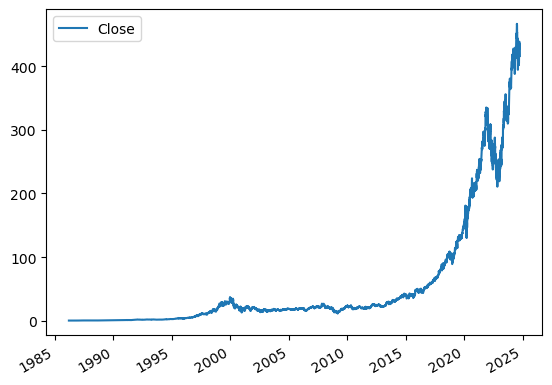

In [29]:
msft_hist.plot.line(y="Close",use_index = True)

In [30]:
# Data Preprocessing for Future Use | Data Transformation
# If this data set is to be used to preparing a model, we need to make a separate column for the next day stock value to check whether are prediction is even correct or not.
# The training can be done for the same day, but for testing we need to predict the next day data for the model to align with real-world usage. For this the values are shifted.
# Other than that a Target value is assigned | 1 == Stock goes up, 0 ==  goes down

In [31]:
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual Close'})

data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [32]:
data

,Actual Close,Target
1986-03-13 05:00:00,0.059947,NaN
1986-03-14 05:00:00,0.062087,1.0
1986-03-17 05:00:00,0.063158,1.0
1986-03-18 05:00:00,0.061552,0.0
1986-03-19 05:00:00,0.060482,0.0
...,...,...
2024-09-30 04:00:00,430.299988,1.0
2024-10-01 04:00:00,420.690002,0.0
2024-10-02 04:00:00,417.130005,0.0
2024-10-03 04:00:00,416.540009,0.0


In [33]:
msft_prev = msft_hist.copy()

In [34]:
msft_prev

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13 05:00:00,0.054594,0.062623,0.054594,0.059947,1031788800,0.0,0.0
1986-03-14 05:00:00,0.059947,0.063158,0.059947,0.062087,308160000,0.0,0.0
1986-03-17 05:00:00,0.062087,0.063694,0.062087,0.063158,133171200,0.0,0.0
1986-03-18 05:00:00,0.063158,0.063694,0.061017,0.061552,67766400,0.0,0.0
1986-03-19 05:00:00,0.061552,0.062087,0.059946,0.060482,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-30 04:00:00,428.209991,430.420013,425.369995,430.299988,16807300,0.0,0.0
2024-10-01 04:00:00,428.450012,428.480011,418.809998,420.690002,19092900,0.0,0.0
2024-10-02 04:00:00,422.579987,422.820007,416.709991,417.130005,16582300,0.0,0.0
2024-10-03 04:00:00,417.630005,419.549988,414.290009,416.540009,13686400,0.0,0.0


In [35]:
msft_prev = msft_prev.shift(1)

In [36]:
msft_prev

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 05:00:00,0.054594,0.062623,0.054594,0.059947,1.031789e+09,0.0,0.0
1986-03-17 05:00:00,0.059947,0.063158,0.059947,0.062087,3.081600e+08,0.0,0.0
1986-03-18 05:00:00,0.062087,0.063694,0.062087,0.063158,1.331712e+08,0.0,0.0
1986-03-19 05:00:00,0.063158,0.063694,0.061017,0.061552,6.776640e+07,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-30 04:00:00,431.519989,431.850006,427.470001,428.019989,1.489610e+07,0.0,0.0
2024-10-01 04:00:00,428.209991,430.420013,425.369995,430.299988,1.680730e+07,0.0,0.0
2024-10-02 04:00:00,428.450012,428.480011,418.809998,420.690002,1.909290e+07,0.0,0.0
2024-10-03 04:00:00,422.579987,422.820007,416.709991,417.130005,1.658230e+07,0.0,0.0


In [37]:
# Predictors are to be specifically assigned to avoid unnecessary confusions 

In [38]:
predictors = ["Close","Volume","Open","High","Low"]
data = data.join(msft_prev[predictors]).iloc[1:]

In [39]:
data.head()

,Actual Close,Target,Close,Volume,Open,High,Low
1986-03-14 05:00:00,0.062087,1.0,0.059947,1.031789e+09,0.054594,0.062623,0.054594
1986-03-17 05:00:00,0.063158,1.0,0.062087,3.081600e+08,0.059947,0.063158,0.059947
1986-03-18 05:00:00,0.061552,0.0,0.063158,1.331712e+08,0.062087,0.063694,0.062087
1986-03-19 05:00:00,0.060482,0.0,0.061552,6.776640e+07,0.063158,0.063694,0.061017
1986-03-20 05:00:00,0.058876,0.0,0.060482,4.789440e+07,0.061552,0.062087,0.059946


In [58]:
# Creating the machine learning model

In [60]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [61]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 200, random_state = 1)

In [62]:
# Training the model

In [63]:
train = data.iloc[:-100]
test = data.iloc[-100:]

In [64]:
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [65]:
from sklearn.metrics import precision_score

pred = model.predict(test[predictors])
pred = pd.Series(pred,index = test.index)
precision_score(test["Target"],pred)

0.75

In [66]:
# The model's accuracy is 75%

<Axes: >

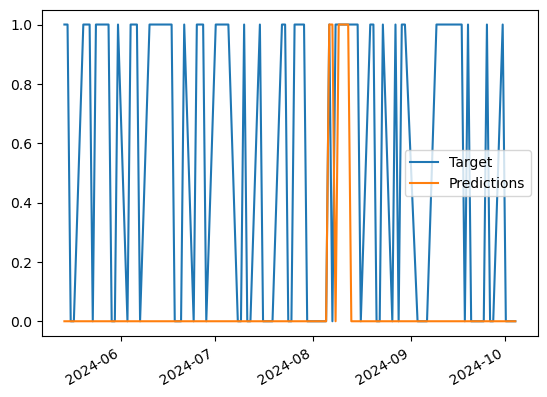

In [67]:
combined = pd.concat({"Target": test["Target"],"Predictions": pred},axis=1)
combined.plot()

In [76]:
# Backtesting

In [78]:
i = 1000
step = 200

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()

model.fit(train[predictors],train["Target"])
pred = model.predict(test[predictors])


In [80]:
pred = model.predict_proba(test[predictors])[:,1]
pred = pd.Series(pred,index = test.index)
pred[pred>0.5] = 1
pred[pred <= 0.5] = 0

In [82]:
predictions = []

for i in range(1000, data.shape[0],step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    
    model.fit(train[predictors],train["Target"])
    
    # Make Predictions
    pred = model.predict_proba(test[predictors])[:,1]
    pred = pd.Series(pred, index = test.index)
    pred[pred>0.5] = 1
    pred[pred <= 0.5] = 0
    
    #combined predictions and test values
    combined = pd.concat({"Target":test["Target"],"Predictions":pred}, axis = 1)

    predictions.append(combined)
    

In [83]:
predictions[0].head()

,Target,Predictions
1990-02-27 05:00:00,0.0,1.0
1990-02-28 05:00:00,1.0,1.0
1990-03-01 05:00:00,1.0,1.0
1990-03-02 05:00:00,1.0,1.0
1990-03-05 05:00:00,1.0,1.0


In [86]:
def backtest(data, model, predictors, start = 1000, step = 200):
    predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
    
        model.fit(train[predictors],train["Target"])
    
        # Make Predictions
        pred = model.predict_proba(test[predictors])[:,1]
        pred = pd.Series(pred, index = test.index)
        pred[pred>0.5] = 1
        pred[pred <= 0.5] = 0
    
        #combined predictions and test values
        combined = pd.concat({"Target":test["Target"],"Predictions":pred}, axis = 1)

        predictions.append(combined)
    return pd.concat(predictions)

In [88]:
predictions = backtest(data,model,predictors)

In [89]:
predictions

,Target,Predictions
1990-02-27 05:00:00,0.0,1.0
1990-02-28 05:00:00,1.0,1.0
1990-03-01 05:00:00,1.0,1.0
1990-03-02 05:00:00,1.0,1.0
1990-03-05 05:00:00,1.0,1.0
...,...,...
2024-09-30 04:00:00,1.0,0.0
2024-10-01 04:00:00,0.0,0.0
2024-10-02 04:00:00,0.0,0.0
2024-10-03 04:00:00,0.0,0.0


In [90]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5189302884615384

In [94]:
predictions["Predictions"].value_counts()

Predictions
0.0    5390
1.0    3328
Name: count, dtype: int64

In [96]:
predictions["Target"].value_counts()

Target
1.0    4425
0.0    4293
Name: count, dtype: int64

In [98]:
# Rolling means
# By this we can averages of the previous data to improve our recent predictions, example rolling by a week, a quater, an year, or many more ways as per choice.

In [100]:
weekly_mean = data.rolling(7).mean()["Close"]
quarterly_mean = data.rolling(90).mean()["Close"]
annual_mean = data.rolling(365).mean()["Close"]

In [102]:
weekly_trend = data.shift(1).rolling(7).sum()["Target"]

In [104]:
data["weekly_mean"] = weekly_mean / data["Close"]
data["quarterly_mean"] = quarterly_mean / data["Close"]
data["annual_mean"] = annual_mean / data["Close"]


In [106]:
data["annual_weekly_mean"] = data["annual_mean"]/data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"]/data["quarterly_mean"]

In [108]:
data ["weekly_trend"] = weekly_trend

In [111]:
data["open_close_ratio"] = data["Open"] / data["Close"] 
data["high_close_ratio"] = data["High"] / data["Close"] 
data["low_close_ratio"] = data["Low"] / data["Close"]

In [113]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio","low_close_ratio"]


In [115]:
# Updating the predictors

predictions = backtest(data.iloc[365:], model, full_predictors)
precision_score(predictions["Target"], predictions["Predictions"])

0.5309898242368177

In [116]:
# Evaluating our parameters

predictions["Predictions"].value_counts()

Predictions
0.0    5110
1.0    3243
Name: count, dtype: int64

<Axes: >

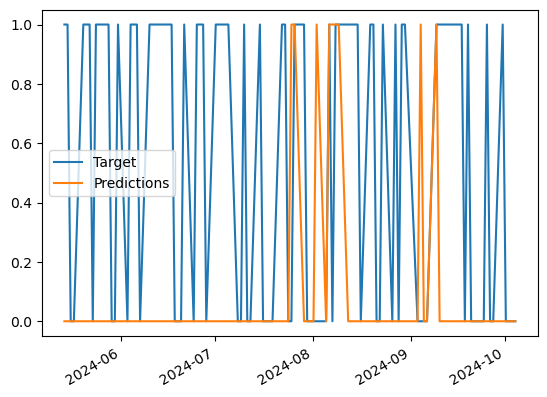

In [117]:
predictions.iloc[-100:].plot()

In [2]:
# There is not much improvement in the results, the model can still be refined by a lot.